<a href="https://colab.research.google.com/github/Aravinda89/fastai_bootcamp/blob/main/Gayan_DL201_08_collab_own_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative Filtering - Own Code

Refactored code and notes from `08_collab.ipynb`.

## Refactor end to end collaborative filtering

Rewrite the code to create a Collaborative Filtering model on the same *MovieLens* dataset as in the Chapter 8 notebook, but with only the code necessary to load the dataset, create the DataLoaders and the model, and run it. Also add any code you personally consider important for you to understand what you are doing or verify/test things. Add you onw comment and references for your future self when you are comng back to this book.

### Imports and setup

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *

     |████████████████████████████████| 727kB 3.9MB/s 
     |████████████████████████████████| 204kB 18.2MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 1.2MB 20.7MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
Mounted at /content/gdrive


### Loading the dataset

In [ ]:
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [ ]:
[p.name for p in path.ls() if 'READ' in p.name or 'read' in p.name]

['README']

In [ ]:
with open(path/'README', 'r') as f:
    print(f.read())

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [ ]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


### Creating the DataLoaders

In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


In [ ]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [ ]:
dls.classes['user']

['#na#', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,

In [ ]:
dls.classes['title']

['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (1994)', 'Airh

In [ ]:
n_users  = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

user_factors.shape, movie_factors.shape

(torch.Size([944, 5]), torch.Size([1665, 5]))

In [ ]:
x, y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [ ]:
x[0]

tensor([  73, 1304])

In [ ]:
y[0]

tensor([3], dtype=torch.int8)

### Creating your model with fastai

In [ ]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)

In [ ]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [ ]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.338420,1.292614,00:07
1,1.081308,1.084311,00:07
2,0.940145,0.973515,00:07
3,0.800294,0.884075,00:07
4,0.760226,0.868402,00:07


In [ ]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [ ]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.979507,0.987747,00:07
1,0.855737,0.889784,00:07
2,0.701710,0.861534,00:07
3,0.471535,0.870947,00:07
4,0.367713,0.876150,00:07


In [ ]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [ ]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.967311,0.925193,00:08
1,0.815430,0.853369,00:08
2,0.590763,0.860183,00:08
3,0.400310,0.882230,00:08
4,0.295551,0.888762,00:08


In [ ]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.948904,0.946766,00:08
1,0.836741,0.871036,00:08
2,0.708097,0.826908,00:08
3,0.609791,0.813780,00:08
4,0.487490,0.814410,00:08


In [ ]:
#Creating Our Own Embedding Module

In [ ]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [ ]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users*movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)

In [ ]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.947374,0.946290,00:07
1,0.851010,0.861772,00:07
2,0.696769,0.827943,00:07
3,0.592436,0.815095,00:07
4,0.483277,0.816271,00:07


In [ ]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [ ]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.932224,0.944809,00:08
1,0.833274,0.870796,00:08
2,0.741055,0.823043,00:08
3,0.582303,0.812914,00:08
4,0.486723,0.814333,00:08


In [ ]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [ ]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [ ]:
dls.classes['title'][3]

'101 Dalmatians (1996)'

In [ ]:
dls.classes['title'].o2i['101 Dalmatians (1996)']

3

In [ ]:
m_list = [619, 774, 613, 624]
for m in m_list:
    print(dls.classes['title'][m])

Gone with the Wind (1939)
Jaws (1975)
Godfather, The (1972)
GoodFellas (1990)


In [ ]:
dls.classes['title'].o2i['Gone with the Wind (1939)']

619

In [ ]:
idxs = [619]
print(f"Latent Factors for: {dls.classes['title'][idxs]}")
learn.u_weight.weight[idxs]

Latent Factors for: ['Gone with the Wind (1939)']


tensor([[-0.0498, -0.0244,  0.0606,  0.0887, -0.1765,  0.0488, -0.2204,  0.2535,  0.1833, -0.1311, -0.2289,  0.0668,  0.0407,  0.0474,  0.0939, -0.0074, -0.2555, -0.0948, -0.0589,  0.2755, -0.0060,
          0.1700, -0.0328,  0.0511,  0.1328, -0.2358, -0.2462, -0.0528, -0.1452,  0.1738,  0.0527, -0.1182,  0.1739, -0.1423, -0.0038, -0.1363, -0.2269,  0.0592,  0.0527,  0.1500,  0.0014, -0.0570,
          0.0958, -0.0372, -0.1251, -0.1081, -0.0793, -0.2896,  0.1535, -0.0171]], grad_fn=<IndexBackward>)

In [ ]:
idxs = [619, 774, 613, 624]
print(f"Latent Factors for: {dls.classes['title'][idxs]}\n")
learn.u_weight.weight[idxs]

Latent Factors for: ['Gone with the Wind (1939)', 'Jaws (1975)', 'Godfather, The (1972)', 'GoodFellas (1990)']



tensor([[-0.0498, -0.0244,  0.0606,  0.0887, -0.1765,  0.0488, -0.2204,  0.2535,  0.1833, -0.1311, -0.2289,  0.0668,  0.0407,  0.0474,  0.0939, -0.0074, -0.2555, -0.0948, -0.0589,  0.2755, -0.0060,
          0.1700, -0.0328,  0.0511,  0.1328, -0.2358, -0.2462, -0.0528, -0.1452,  0.1738,  0.0527, -0.1182,  0.1739, -0.1423, -0.0038, -0.1363, -0.2269,  0.0592,  0.0527,  0.1500,  0.0014, -0.0570,
          0.0958, -0.0372, -0.1251, -0.1081, -0.0793, -0.2896,  0.1535, -0.0171],
        [ 0.4202,  0.0476, -0.4931,  0.1423,  0.1439,  0.2776,  0.0259, -0.1242,  0.0174, -0.0367, -0.1823,  0.0184,  0.0239, -0.0701,  0.1821,  0.1682, -0.0387,  0.0293, -0.1946,  0.1155,  0.1394,
         -0.0484, -0.1161, -0.0952, -0.1817,  0.0665, -0.0072, -0.1668, -0.0592,  0.0931,  0.0678, -0.0760,  0.1221, -0.1723, -0.0393,  0.0747,  0.4137,  0.1565,  0.0241, -0.0361,  0.0368, -0.1966,
         -0.0110,  0.2422, -0.2123,  0.1356,  0.0997, -0.0091,  0.0568, -0.0983],
        [-0.1604, -0.1465,  0.1277,  0.2120,

In [ ]:
idxs = [1, 10, 56, 106]
print(f"Latent Factors for user with ID: {dls.classes['user'][idxs]}\n")
learn.u_weight.weight[idxs]

Latent Factors for user with ID: [1, 10, 56, 106]



tensor([[-0.3147, -0.3554, -0.1662, -0.0500, -0.1084,  0.2879, -0.2028, -0.3101, -0.0888, -0.1423,  0.2647,  0.0214, -0.0791,  0.2804, -0.2269,  0.1658,  0.1684,  0.0029,  0.2178,  0.0589, -0.1786,
          0.2392,  0.3472, -0.0445, -0.0683,  0.2463, -0.2484, -0.1949, -0.3616, -0.2386,  0.0169,  0.2565,  0.3576, -0.1624,  0.4346,  0.2300,  0.0495, -0.3916,  0.0489,  0.1668, -0.0025, -0.1206,
          0.0105,  0.4759, -0.1140, -0.3837, -0.5108,  0.0055,  0.0656, -0.1702],
        [-0.0701, -0.1462,  0.0806,  0.0432, -0.0989,  0.0545, -0.1188, -0.0519, -0.0605, -0.1762,  0.0215,  0.2055, -0.1466,  0.0077, -0.0448,  0.1478, -0.1968,  0.0212,  0.1829,  0.0977, -0.1549,
          0.1716, -0.0710,  0.0934,  0.0481, -0.2202, -0.2916, -0.1407, -0.0535, -0.1837, -0.1150,  0.1682, -0.0601, -0.3338,  0.0186, -0.2053, -0.1724, -0.2533, -0.2058,  0.1896, -0.2139, -0.1028,
          0.0552,  0.2483, -0.1067,  0.0135, -0.0136, -0.2249,  0.0970,  0.0216],
        [ 0.0743, -0.1267, -0.1985,  0.1264,

In [ ]:
idxs = [619, 774, 613, 624]
print(f"Latent Factors for: {dls.classes['title'][idxs]}\n")
learn.i_weight.weight[idxs]

Latent Factors for: ['Gone with the Wind (1939)', 'Jaws (1975)', 'Godfather, The (1972)', 'GoodFellas (1990)']



tensor([[-0.1388, -0.0991,  0.4058, -0.0332, -0.4819, -0.0082, -0.1650,  0.1436,  0.0645, -0.1628,  0.1251,  0.1269, -0.3807,  0.0270, -0.0385, -0.1125, -0.1167, -0.1150,  0.0922,  0.2132, -0.1640,
          0.2705,  0.1240,  0.2897, -0.0297, -0.2375, -0.3291, -0.2859, -0.1645,  0.0723, -0.2470,  0.1678,  0.1069, -0.2224,  0.0907,  0.1459, -0.0752, -0.0495, -0.0346,  0.1795, -0.2217,  0.0083,
         -0.3680, -0.0604, -0.0137, -0.0943,  0.4876, -0.3252,  0.1742, -0.1248],
        [ 0.0389, -0.1440, -0.1180,  0.2573,  0.0014,  0.1888, -0.3723,  0.3614, -0.0199, -0.0702, -0.0164,  0.5920,  0.0533,  0.0027,  0.0354,  0.1001,  0.0308, -0.1496, -0.1225,  0.0196, -0.0631,
          0.1435,  0.0150,  0.2577,  0.0494, -0.0491, -0.4334, -0.1209, -0.2844, -0.1643, -0.0173,  0.2454,  0.0462, -0.4145, -0.0864, -0.0496, -0.1692,  0.0320,  0.0207,  0.4340,  0.2546, -0.0783,
         -0.1676,  0.1335, -0.1800, -0.0014,  0.1045, -0.0238, -0.0962, -0.0915],
        [ 0.2041, -0.4766, -0.4194,  0.0436,

In [ ]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

["Schindler's List (1993)",
 'Star Wars (1977)',
 'Titanic (1997)',
 'L.A. Confidential (1997)',
 'Good Will Hunting (1997)']

In [ ]:
movie_title = 'Gone with the Wind (1939))'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

['Devil in a Blue Dress (1995)',
 '1-900 (1994)',
 'Akira (1988)',
 'Chungking Express (1994)',
 'Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)']

In [ ]:
movie_title = 'Jaws (1975)'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

['Pinocchio (1940)',
 'Wonderful, Horrible Life of Leni Riefenstahl, The (1993)',
 'Ben-Hur (1959)',
 "Microcosmos: Le peuple de l'herbe (1996)",
 "Carlito's Way (1993)"]

In [ ]:
movie_title = 'Godfather, The (1972)'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

['Godfather: Part II, The (1974)',
 'Raging Bull (1980)',
 'Trust (1990)',
 'Walk in the Sun, A (1945)',
 'For Whom the Bell Tolls (1943)']

In [ ]:
movie_title = 'GoodFellas (1990)'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

['Good, The Bad and The Ugly, The (1966)',
 'Godfather: Part II, The (1974)',
 'Before Sunrise (1995)',
 'Casino (1995)',
 'Donnie Brasco (1997)']

### Interpreting the results

In [ ]:
# movie_bias = learn.model.movie_bias.squeeze()
# idxs = movie_bias.argsort()[:5]
# # [dls.classes['title'][i] for i in idxs]

In [ ]:
idxs = movie_bias.argsort(descending=False)[:5]
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Cable Guy, The (1996)',
 'Vampire in Brooklyn (1995)',
 'Barb Wire (1996)']

In [ ]:
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

["Schindler's List (1993)",
 'Star Wars (1977)',
 'Titanic (1997)',
 'L.A. Confidential (1997)',
 'Good Will Hunting (1997)']

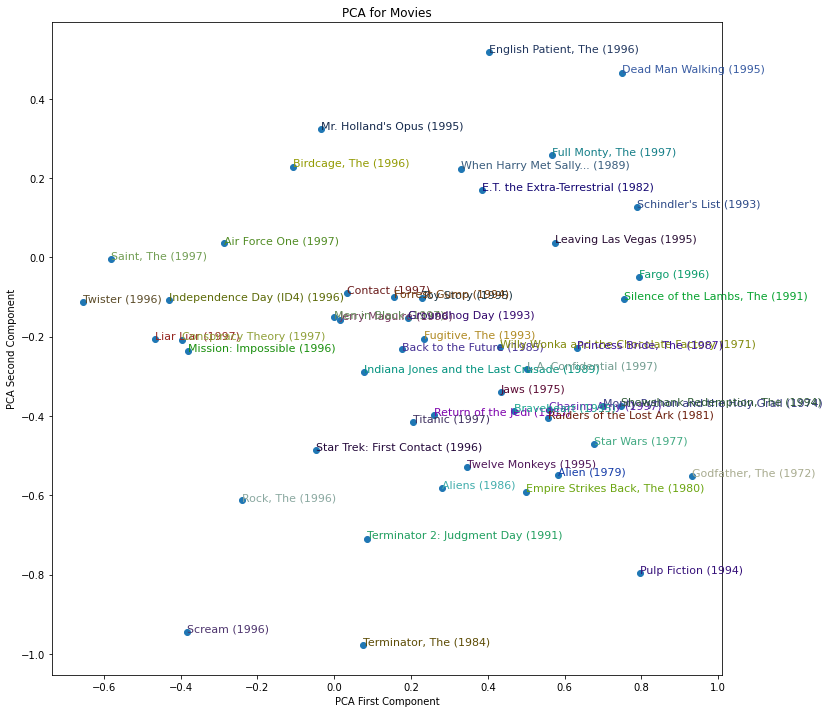

In [ ]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()

movie_pca = movie_w.pca(3)
fac0, fac1, fac2 = movie_pca.t()
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]

plt.figure(figsize=(12,12))
plt.scatter(X, Y)
plt.title('PCA for Movies')
plt.xlabel('PCA First Component')
plt.ylabel('PCA Second Component')

for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y, i, color=np.random.rand(3) * 0.7, fontsize=11)

plt.show();

#### Find movie that are similar to another movie

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Priest (1994)'

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i["Schindler's List (1993)"]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Shawshank Redemption, The (1994)'

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i["Star Wars (1977)"]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Return of the Jedi (1983)'

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i["Shawshank Redemption, The (1994)"]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

"Schindler's List (1993)"

## Create a new model, using deep learning instead of PMF
Code above used *probabilistic matrix factorization (PMF)*. Following cells make a new model for the deep learning version.

In [ ]:
embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [ ]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)

        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        
        self.y_range = y_range
        
    def forward(self, x):
        embs = self.user_factors(x[:,0]), self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

In [ ]:
model = CollabNN(*embs)

In [ ]:
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.953924,0.951593,00:09
1,0.904757,0.892170,00:09
2,0.859891,0.868604,00:09
3,0.787919,0.856277,00:09
4,0.734621,0.858554,00:09


In [ ]:
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.993911,0.974529,00:12
1,0.927056,0.906486,00:12
2,0.883869,0.878389,00:12
3,0.803916,0.855598,00:12
4,0.749335,0.855476,00:12


In [ ]:
# Create the Collab Filtering model

class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

epoch,train_loss,valid_loss,time
0,0.949852,0.923733,00:08
1,0.823853,0.850528,00:07
2,0.597979,0.861329,00:08
3,0.386285,0.890368,00:08
4,0.262233,0.897335,00:07


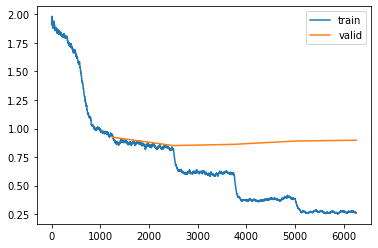

In [ ]:
wd_test = 0.0
lr = 5e-3
epochs = 5

set_seed(1988, reproducible=True)

dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
model = DotProductBias(n_users, n_movies, 50)
learn_no_wd = Learner(dls, model, loss_func=MSELossFlat())
learn_no_wd.fit_one_cycle(epochs, lr, wd=wd_test)
learn_no_wd.recorder.plot_loss()

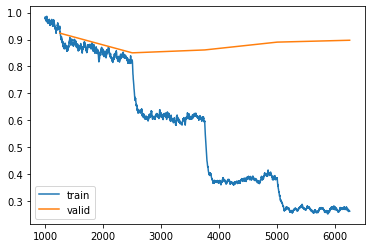

In [ ]:
learn_no_wd.recorder.plot_loss(skip_start=1000)

epoch,train_loss,valid_loss,time
0,0.960804,0.933810,00:08
1,0.854080,0.862984,00:08
2,0.728801,0.825311,00:08
3,0.593453,0.813169,00:08
4,0.482809,0.813136,00:07


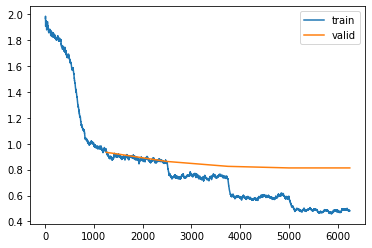

In [ ]:
wd_test = 0.1
lr = 5e-3
epochs = 5

set_seed(1988, reproducible=True)

dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
model = DotProductBias(n_users, n_movies, 50)
learn_typical_wd = Learner(dls, model, loss_func=MSELossFlat())
learn_typical_wd.fit_one_cycle(epochs, lr, wd=wd_test)
learn_typical_wd.recorder.plot_loss()

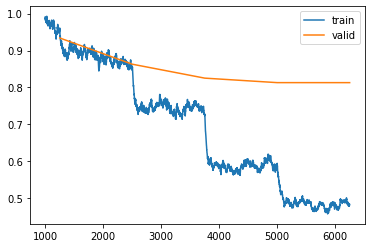

In [ ]:
learn_typical_wd.recorder.plot_loss(skip_start=1000)

epoch,train_loss,valid_loss,time
0,1.053355,1.029261,00:08
1,1.011941,1.015972,00:08
2,1.002579,0.993225,00:08
3,0.957208,0.963042,00:07
4,0.934998,0.953659,00:08


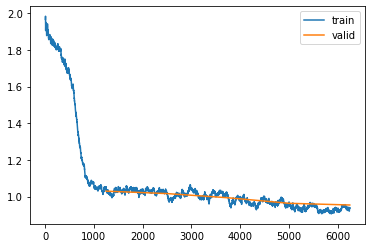

In [ ]:
wd_test = 0.75
lr = 5e-3
epochs = 5

set_seed(1988, reproducible=True)

dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
model = DotProductBias(n_users, n_movies, 50)
learn_big_wd = Learner(dls, model, loss_func=MSELossFlat())
learn_big_wd.fit_one_cycle(epochs, lr, wd=wd_test)
learn_big_wd.recorder.plot_loss()

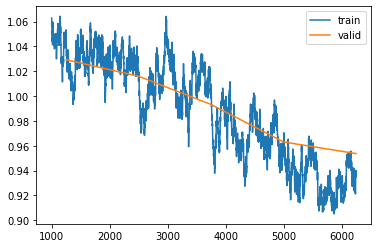

In [ ]:
learn_big_wd.recorder.plot_loss(skip_start=1000)

In [ ]:
learn = collab_learner(dls, y_range=(0,5.5))

In [ ]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [ ]:
learn = collab_learner(dls, use_nn=True, y_range=(0,5.5))

In [ ]:
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.983151,0.961237,00:08
1,0.922732,0.904657,00:08
2,0.858439,0.871358,00:08
3,0.770498,0.852707,00:08
4,0.728335,0.862269,00:08


In [ ]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(944, 74)
    (1): Embedding(1665, 102)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=176, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=50, out_features=1, bias=True)
    )
    (2): SigmoidRange(low=0, high=5.5)
  )
)